Data Sienctist: John Pan

## Overview Dataset
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Data Visualization and Exploration

In [32]:
import numpy as np #library used for working with arrays.
import matplotlib.pyplot as plt #data visualization and graphical plotting library.
import pandas as pd #library written for the Python programming language for data manipulation.
import sys #system-
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR  
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir(r'H:\insurace')
dataset = pd.read_csv('insurance.csv')
dataset.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


<AxesSubplot:xlabel='expenses', ylabel='children'>

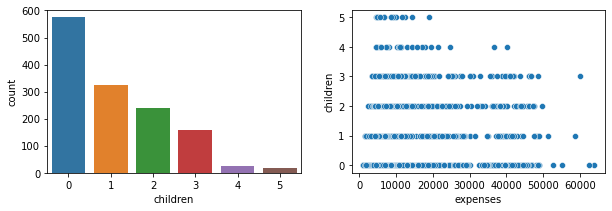

In [8]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.countplot(x='children',data=dataset)
f.add_subplot(122)
sns.scatterplot(data=dataset, x="expenses", y="children")

The number of persons having more than 3 children is comparatively lesser than those have less than 3 children, no trend is being observed that people with lesser children have lesser medical expense

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

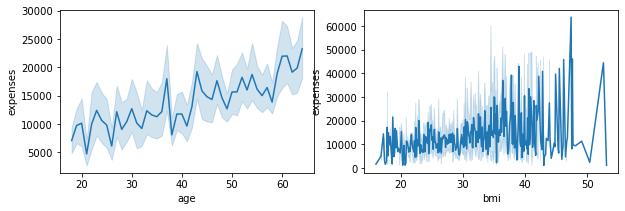

In [9]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.lineplot(x='age',y='expenses',data=dataset)
f.add_subplot(122)
sns.lineplot(x='bmi',y='expenses',data=dataset)

The trend above shows that medical expenses are lower with youger age and lower BMI.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

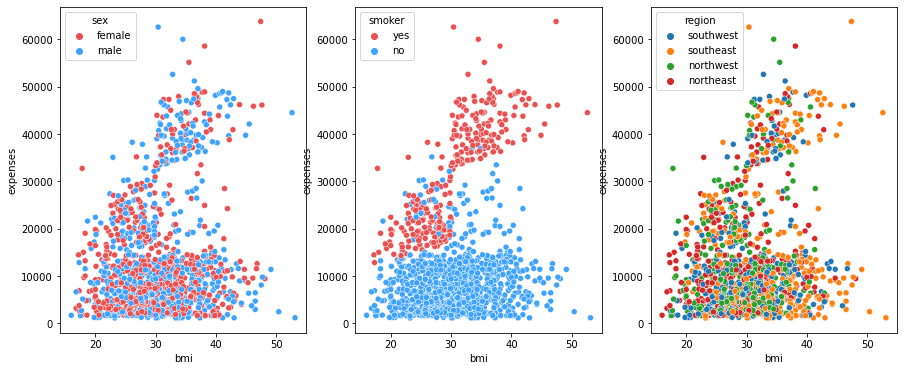

In [10]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=dataset,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=dataset,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=dataset,hue='region')

BMI and Smoker are associated with increasing of medical expense.  Gender and Region are not.

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

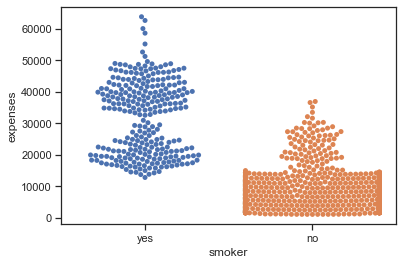

In [20]:
sns.swarmplot(x=dataset['smoker'],
              y=dataset['expenses'])

Text(0, 0.5, 'count')

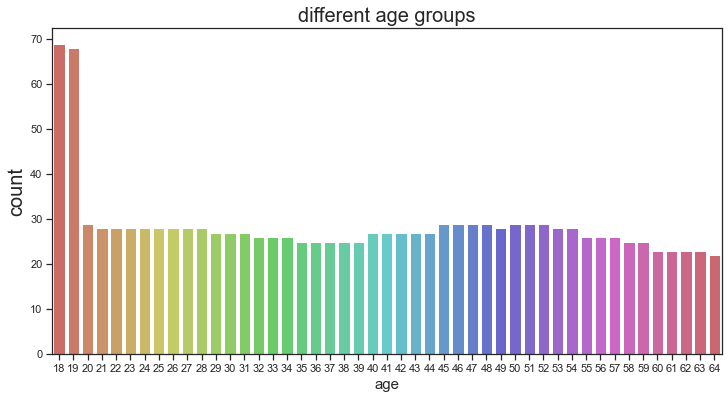

In [15]:
plt.figure(figsize = (12,6))
g = sns.countplot(x="age",data=dataset,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

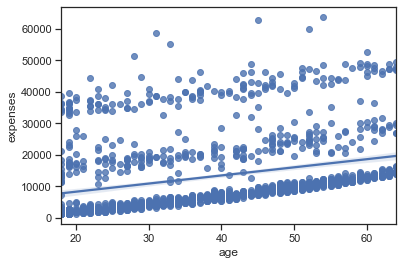

In [25]:
sns.regplot(x = 'age', y = 'expenses', data = dataset)
plt.show()

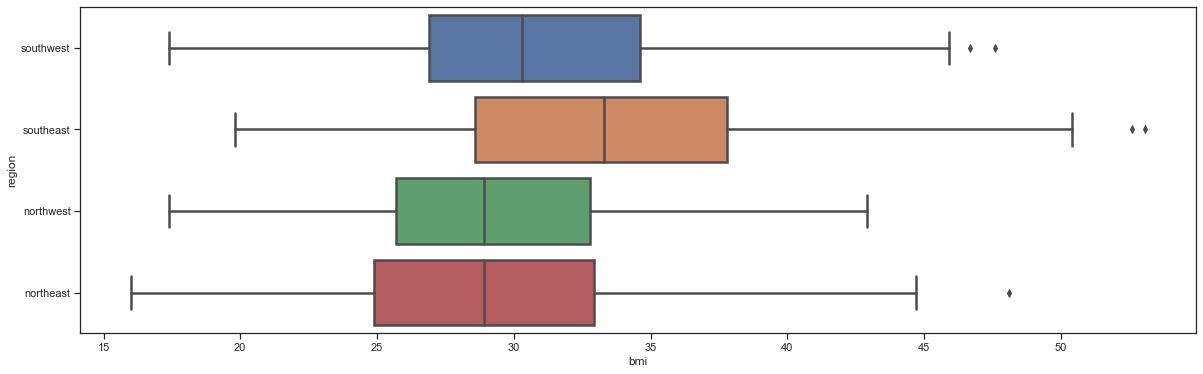

In [17]:
plt.figure(figsize = (20,6))
ax = sns.boxplot(x="bmi" ,y="region", data=dataset, linewidth=2.5)
plt.show()

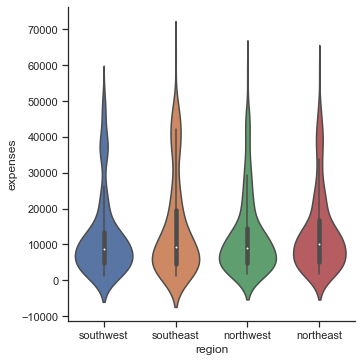

In [27]:
sns.catplot(x='region',y='expenses',kind='violin',data=dataset)

<AxesSubplot:xlabel='region', ylabel='expenses'>

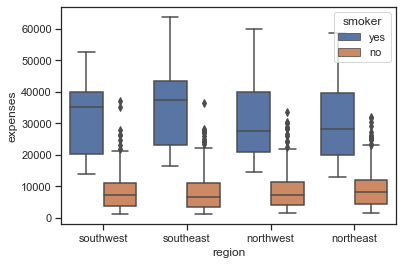

In [28]:
sns.boxplot(x='region',y='expenses',hue='smoker' ,data=dataset)

In [ ]:
## Correlation Between Features

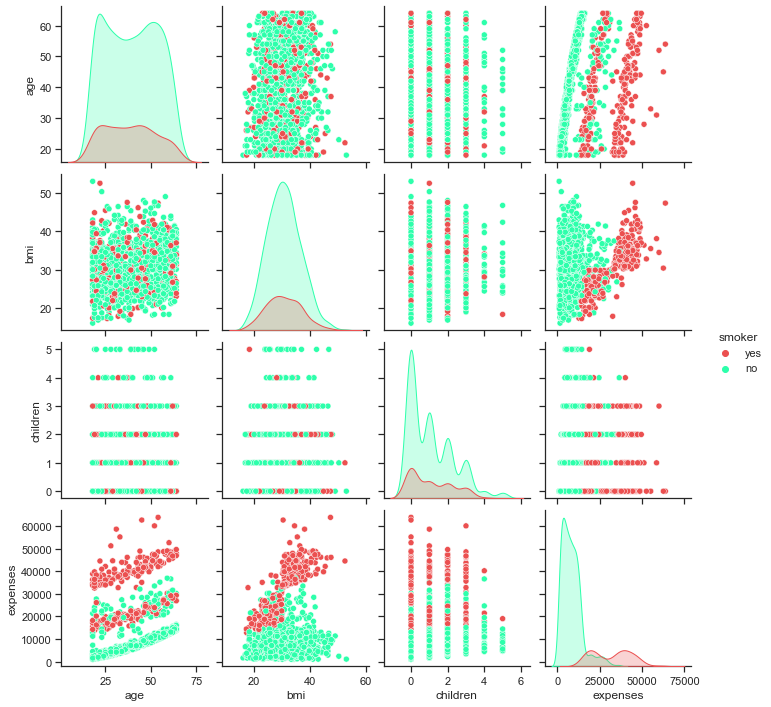

In [29]:
palette=['#EB5050','#2DFFAB'] 
sns.set(style="ticks")
sns.pairplot(data=dataset, hue='smoker', palette=palette)

<AxesSubplot:>

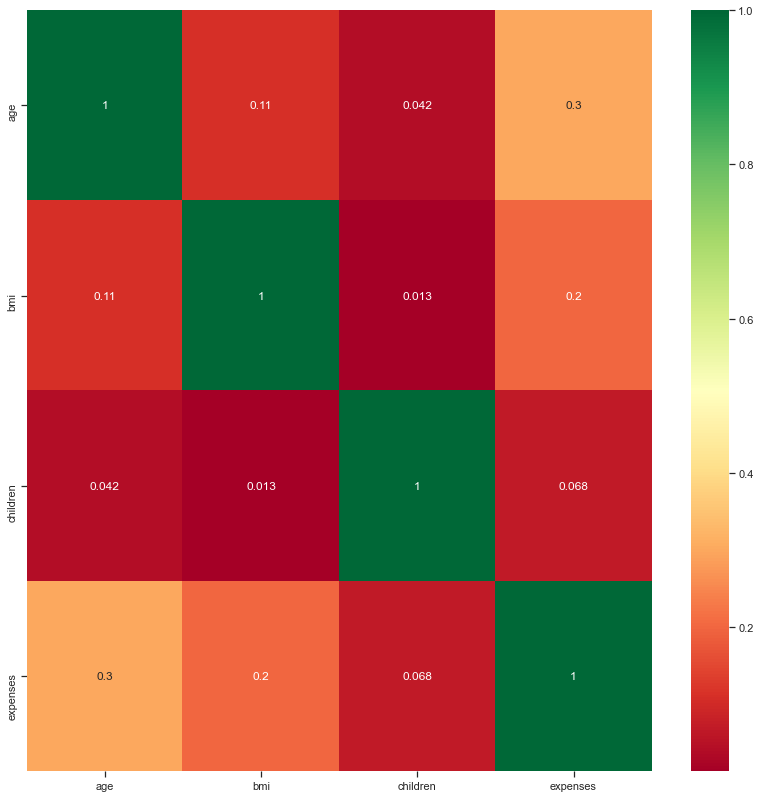

In [31]:
corr=dataset.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

##  Data Preparation for Machine Learning

In [34]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col, ':', dataset[col].unique())
    else:
        print(col, ':', dataset[col].nunique())

age : 47
sex : ['female' 'male']
bmi : 275
children : 6
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']
expenses : 1337


In [35]:
# Binning
bins = [0.0, 18.5, 24.9, 29.9, 60]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
dataset['bmi_cat'] = pd.cut(dataset['bmi'], bins, labels=labels)

In [36]:
# Categorical to Numerical Encoding
le = LabelEncoder()

dataset['children'] = le.fit_transform(dataset['children'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

ohe = OneHotEncoder() 

dataset['sex'] = ohe.fit_transform(dataset[['sex']]).toarray()

regional_area = pd.DataFrame(ohe.fit_transform(dataset[['region']]).toarray(), columns = ['NE', 'NW', 'SE', 'SW'])

bmi_bins = pd.DataFrame(ohe.fit_transform(dataset[['bmi_cat']]).toarray(), 
                        columns= ['Normal', 'Obese', 'Overweight', 'Underweight'])

dataset = pd.concat([ dataset.iloc[:,:2], dataset.iloc[:,7:8], bmi_bins, dataset.iloc[:,3:6], regional_area, dataset.iloc[:,-2:-1]], axis=1)


In [37]:
# Analysis
dataset.sample(5)

,age,sex,bmi_cat,Normal,Obese,Overweight,Underweight,children,smoker,region,NE,NW,SE,SW,expenses
1232,54,1.0,Normal,1.0,0.0,0.0,0.0,3,0,northwest,0.0,1.0,0.0,0.0,12479.71
336,60,0.0,Overweight,0.0,0.0,1.0,0.0,0,0,southeast,0.0,0.0,1.0,0.0,12142.58
23,34,1.0,Obese,0.0,1.0,0.0,0.0,1,1,northeast,1.0,0.0,0.0,0.0,37701.88
764,45,1.0,Overweight,0.0,0.0,1.0,0.0,2,0,northeast,1.0,0.0,0.0,0.0,9095.07
190,61,0.0,Obese,0.0,1.0,0.0,0.0,0,0,southeast,0.0,0.0,1.0,0.0,12557.61


In [38]:
for i in range(len(dataset.columns)-1):
    if dataset.columns[i] in ['region', 'bmi_cat']:
        continue
        
    print(dataset.columns[i])
    
    #for numerical-numerical
    if dataset.columns[i] in ['age', 'bmi']:
        
        pearson_coef, p_val = stats.pearsonr(dataset[dataset.columns[i]], dataset['expenses'])
        print('Pearson Coefficient :',pearson_coef,'\nP Value :',p_val,'\n')
        
        spearman_coef, p_val = stats.spearmanr(dataset[dataset.columns[i]], dataset['expenses'])
        print('Spearman Coefficient :',spearman_coef,'\nP Value :',p_val,'\n\n')
        
    #fot numerical-categorical    
    else:
        #one-way ANOVA
        F, p = stats.f_oneway(dataset[dataset.columns[i]],dataset['expenses'])
        print('F-Statistic=%.3f, p=%.3f\n\n' % (F, p))

age
Pearson Coefficient : 0.2990081922850827 
P Value : 4.886695589992816e-29 

Spearman Coefficient : 0.5343921337718459 
P Value : 1.130692027803638e-99 


sex
F-Statistic=1606.587, p=0.000


Normal
F-Statistic=1606.666, p=0.000


Obese
F-Statistic=1606.578, p=0.000


Overweight
F-Statistic=1606.636, p=0.000


Underweight
F-Statistic=1606.703, p=0.000


children
F-Statistic=1606.441, p=0.000


smoker
F-Statistic=1606.657, p=0.000


NE
F-Statistic=1606.648, p=0.000


NW
F-Statistic=1606.648, p=0.000


SE
F-Statistic=1606.640, p=0.000


SW
F-Statistic=1606.648, p=0.000




In [39]:
dataset.corr()

,age,sex,Normal,Obese,Overweight,Underweight,children,smoker,NE,NW,SE,SW,expenses
age,1.000000,0.020856,-0.077350,0.085668,-0.014125,-0.061373,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
sex,0.020856,1.000000,0.022770,-0.047317,0.024805,0.031388,-0.017163,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.057292
Normal,-0.077350,0.022770,1.000000,-0.470830,-0.284781,-0.056168,0.008390,0.023655,0.086845,0.039045,-0.091009,-0.031356,-0.105291
Obese,0.085668,-0.047317,-0.470830,1.000000,-0.677699,-0.133663,0.009807,0.000810,-0.098564,-0.082849,0.170445,0.004433,0.199532
Overweight,-0.014125,0.024805,-0.284781,-0.677699,1.000000,-0.080846,-0.016285,-0.023087,0.018452,0.051859,-0.091820,0.024993,-0.120075
Underweight,-0.061373,0.031388,-0.056168,-0.133663,-0.080846,1.000000,-0.004956,0.010424,0.068987,0.026629,-0.077195,-0.015437,-0.048117
children,0.042469,-0.017163,0.008390,0.009807,-0.016285,-0.004956,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,-0.025019,-0.076185,0.023655,0.000810,-0.023087,0.010424,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
NE,0.002475,0.002425,0.086845,-0.098564,0.018452,0.068987,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
NW,-0.000407,0.011156,0.039045,-0.082849,0.051859,0.026629,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905


In [44]:
# Data Standardization
dataset.drop(columns = ['region', 'bmi_cat'], inplace=True)

scaler = RobustScaler()

dataset[['age', 'children', 'expenses']] = scaler.fit_transform(dataset[['age', 'children', 'expenses']])


In [45]:
## Build Machine Learning Models

In [46]:
y_data = dataset['expenses']
x_data = dataset.iloc[:,:12]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

### Multiple Linear Regression

In [47]:
#regression object
mlr = LinearRegression()

#training the model
mlr.fit(x_train, y_train)

#predict values
pred_mlr = mlr.predict(x_test)

### Polynomial Regression

In [48]:
poly_reg = PolynomialFeatures(degree=2)
x_poly_data  = poly_reg.fit_transform(x_data)
x_poly_train, x_poly_test = train_test_split(x_poly_data, test_size = 0.15)


lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly_train,y_train)
 
pred_poly = lin_reg2.predict(x_poly_test)

### Ridge Regression

In [50]:
RR = Ridge(alpha=0.01)

RR.fit(x_poly_train, y_train)

yhat_ridge = RR.predict(x_poly_test)

In [51]:
# tune hyperparameters (alpha) for Ridge Regression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [0.01, 0.03, 0.1, 0.3, 1]
search = GridSearchCV(RR, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results=search.fit(x_data, y_data)
print('Best Estimate for Hyper Parameter Tuning : ', str(results.best_estimator_))

best_alpha_str = str(results.best_estimator_)
best_alpha = int(re.findall('\d', best_alpha_str)[0])
best_alpha

# final Ridge Regression model:

RR = Ridge(alpha = best_alpha)
RR.fit(x_poly_train, y_train)
pred_ridge = RR.predict(x_poly_test)

Best Estimate for Hyper Parameter Tuning :  Ridge(alpha=0.01)


### Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
dec_tree_reg.fit(x_train, y_train) 
pred_dec_tree = dec_tree_reg.predict(x_test)

### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
rand_forr_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
rand_forr_reg.fit(x_train, y_train)
pred_rand_forr = rand_forr_reg.predict(x_test)

## Evaluation Metrics

In [54]:
def evaluate(estimator, pred_val):
    if estimator == lin_reg2:
        x = PolynomialFeatures(degree=2).fit_transform(x_data)
    else:
        x = x_data
    r2 = r2_score(y_test, pred_val)
    rmse = np.sqrt(mean_squared_error(y_test, pred_val))
    score = cross_val_score(estimator, x, y_data, cv=4).mean()
    return r2, rmse, score

In [55]:
# Linear Regression
mlr_r2, mlr_rmse, mlr_cvscore = evaluate(mlr, pred_mlr)
print(mlr_r2, mlr_rmse, mlr_cvscore)

0.7828960251070181 0.5164482487778549 0.7472410830412947


In [56]:
# Polynomial Regression
poly_r2, poly_rmse, poly_cvscore = evaluate(lin_reg2, pred_poly)
print(poly_r2, poly_rmse, poly_cvscore)

-0.0362736524284768 1.1283144492651234 0.8553265965661587


In [57]:
# Ridge Regression
ridge_r2, ridge_rmse, ridge_cvscore = evaluate(RR, pred_ridge)
print(ridge_r2, ridge_rmse, ridge_cvscore)

-0.23724221097390075 1.2328785193678227 0.7408923728967806


In [58]:
# Decision Tree Regressor
dec_tree_r2, dec_tree_rmse, dec_tree_cvscore = evaluate(dec_tree_reg, pred_dec_tree)
print(dec_tree_r2, dec_tree_rmse, dec_tree_cvscore)

0.8704964483132929 0.3988721933430451 0.8355546691379488


In [59]:
# Random Forest Regressor
ran_r2, ran_rmse, ran_cvscore = evaluate(rand_forr_reg, pred_rand_forr)
print(ran_r2, ran_rmse, ran_cvscore)

0.873790171642614 0.3937671748400975 0.8524627743805069


## Comparing Model perfomances

In [60]:
r2_scores = [mlr_r2, poly_r2, ridge_r2, dec_tree_r2, ran_r2]
rmse_scores = [mlr_rmse, poly_rmse, ridge_rmse, dec_tree_rmse, ran_rmse]
cross_val_scores  = [mlr_cvscore, poly_cvscore, ridge_cvscore, dec_tree_cvscore, ran_cvscore]

In [61]:
models_comparison = pd.DataFrame([r2_scores, rmse_scores, cross_val_scores], 
                                 columns = ['Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 
                                          'Decision Tree Regressor', 'Random Forest Regressor'],
                                 index = ['R2 score', 'RMSE score', 'Cross Validation Score'])

In [62]:
models_comparison

,Multiple Linear Regression,Polynomial Regression,Ridge Regression,Decision Tree Regressor,Random Forest Regressor
R2 score,0.782896,-0.036274,-0.237242,0.870496,0.873790
RMSE score,0.516448,1.128314,1.232879,0.398872,0.393767
Cross Validation Score,0.747241,0.855327,0.740892,0.835555,0.852463


### Decision Tree Regressor and Random Forest Regressor fits to the model the best

In [63]:
# training the model with all data available
rand_forr_reg.fit(x_data, y_data)
dec_tree_reg.fit(x_data, y_data)

DecisionTreeRegressor(max_depth=5, random_state=13)

## Overfitting/Underfitting

In [64]:
y_pred = rand_forr_reg.predict(x_data)
y_pred2 = dec_tree_reg.predict(x_data)

In [65]:
# Residual Plot and Scatterplot
def evaluate_model_vis(sns_fun):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    #fig.title('Decision Tree Regression vs Random Forest Regression perfomance')
    
    sns_fun(ax=axes[0], x=y_pred, y=y_data)
    axes[0].set_title('Decision Tree Regressor')
    plt.xlabel('predicted values')
    plt.ylabel('actual values')
    
    sns_fun(ax=axes[1], x=y_pred2, y=y_data)
    axes[1].set_title('Random Forest Regressor')
    plt.xlabel('predicted values')
    plt.ylabel('actual values')
    
    plt.show()

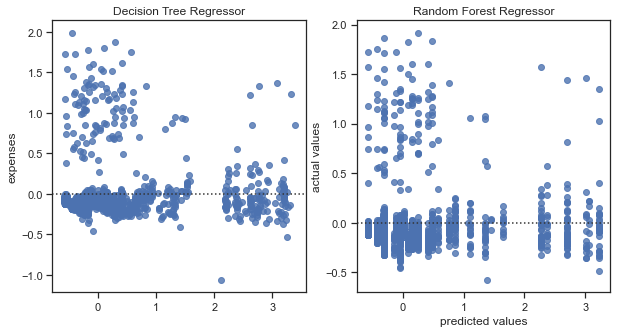

In [66]:
evaluate_model_vis(sns.residplot)

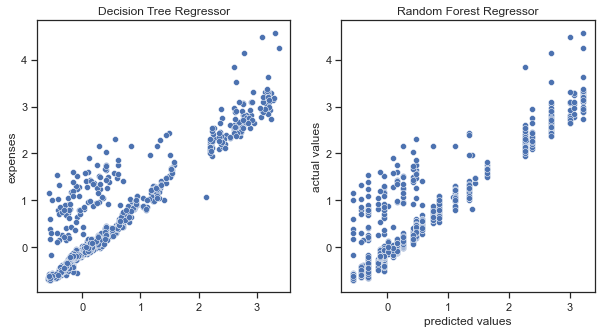

In [67]:
evaluate_model_vis(sns.scatterplot)

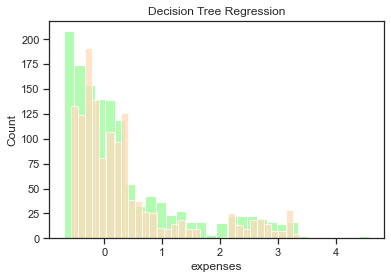

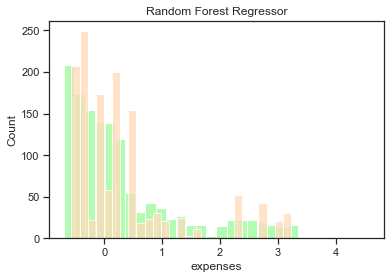

In [68]:
# histogram
a1= sns.histplot(y_data, color = 'palegreen')
a2= sns.histplot(y_pred,   color = 'peachpuff', ax=a1)
plt.title('Decision Tree Regression')
plt.show()

a1= sns.histplot(y_data, color = 'palegreen')
a2= sns.histplot(y_pred2,   color = 'peachpuff', ax=a1)
plt.title('Random Forest Regressor')
plt.show()

the underfitting is due to noise in data.

It seems that Random Forest Regressor fits the data best and so, we will use Random Forest Regressor for our application

### final model

In [69]:
rand_forr_reg.fit(x_data, y_data)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

## Model Serialization

In [70]:
# Save the Modle to file in the current working directory

Pkl_Filename = "insurance_premium_prediction_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rand_forr_reg, file)

In [71]:
# Load the Model back from file
with open('insurance_premium_prediction_model.pkl', 'rb') as file:  
    model = pickle.load(file)

#use model.predict(vec) for predicting values

## Deploy